<a href="https://www.kaggle.com/code/islamic/audio-language-classification?scriptVersionId=168405146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
audio_files = os.listdir('/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset')
for files in audio_files:
    print(files)
print(len(audio_files))

Punjabi
Tamil
Hindi
Bengali
Telugu
Kannada
Gujarati
Urdu
Marathi
Malayalam
10


In [9]:
import librosa
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns
import warnings
from glob import glob
import pandas as pd

warnings.filterwarnings('ignore')

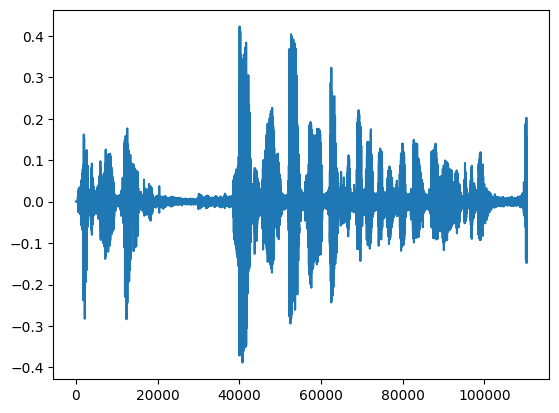

In [4]:
#Bangla language
file_name = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/10001.mp3"
data,sample_rate = librosa.load(file_name)
sns.lineplot(data=data)
file = ipd.Audio(file_name)
ipd.display(file)

In [3]:
librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40) #transform the linear frequency scale into mel scale

array([[-5.26735352e+02, -3.82346497e+02, -2.82229431e+02, ...,
        -3.58177979e+02, -2.57306671e+02, -2.12626923e+02],
       [ 1.18686386e+02,  1.27818298e+02,  1.20777191e+02, ...,
         1.27307617e+02,  1.38683350e+02,  1.60426010e+02],
       [ 2.25240822e+01, -1.89602375e+00, -1.26777287e+01, ...,
         6.55568314e+00,  6.15697193e+00, -1.59609997e+00],
       ...,
       [-1.94487076e+01, -1.04322720e+01, -1.59653211e+00, ...,
        -7.08969498e+00, -2.38136387e+00,  1.82595775e-01],
       [ 1.63797545e+00, -4.23650742e+00, -8.15985799e-01, ...,
         2.65087438e+00,  2.59744215e+00,  2.43675804e+00],
       [ 6.17901707e+00,  4.00892162e+00,  5.56857014e+00, ...,
         7.11476469e+00,  1.27124524e+00, -3.33468723e+00]], dtype=float32)

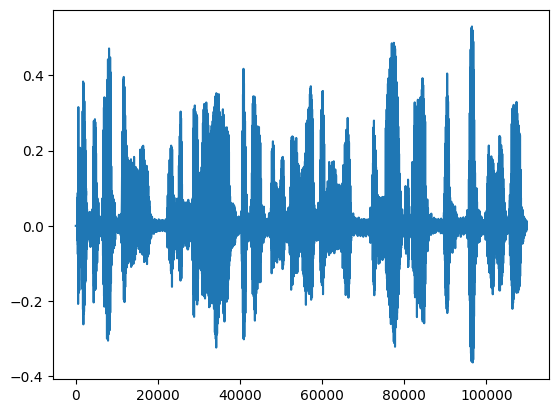

In [4]:
#urdu
import librosa
file_path = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/100.mp3"
audio_data,sample_rate = librosa.load(file_path)
sns.lineplot(audio_data)
ipd.display(ipd.Audio(file_path))

Frame Rate: 48000 Hz
Channels: 2


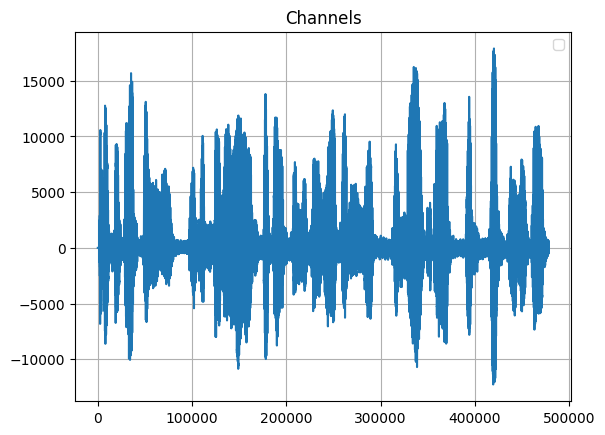

In [5]:
from pydub import AudioSegment

try:
  # Open the MP3 audio file using pydub
  sound = AudioSegment.from_mp3(file_path)

  # Get the frame rate (number of frames per second)
  frame_rate = sound.frame_rate

  # Get the number of channels (mono or stereo)
  channels = sound.channels

  # Access the audio data (raw bytes)
  audio_data = sound.raw_data

  print(f"Frame Rate: {frame_rate} Hz")
  print(f"Channels: {channels}")
  
  # You can perform further processing on the audio data here

except OSError as e:
  print(f"Error reading MP3 file: {e}")

audio_data = sound.get_array_of_samples()
plt.plot(audio_data)
plt.title("Channels")
plt.legend()
plt.grid(True)

In [8]:
#bangla
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfcc_mean = np.mean(mfcc.T,axis=0)
mfcc_mean

array([-3.1291214e+02,  1.2134914e+02,  4.7788291e+00,  1.8086966e+01,
        2.9502344e+00,  7.4431103e-01,  5.8573008e+00,  4.2635517e+00,
       -5.8971400e+00,  3.8191354e+00, -3.4004896e+00, -6.1205606e+00,
       -5.6740193e+00, -3.7250879e+00, -3.4851928e+00, -1.3647242e+00,
       -5.3202739e+00,  1.0354401e+00, -1.0210827e+01, -2.4938307e+00,
       -3.9836369e+00,  1.5814056e+00, -1.1962560e+00,  1.7462127e+00,
       -1.5608201e+00, -2.7378931e+00, -2.7203610e+00, -3.2749083e+00,
       -7.8092413e+00,  1.3183382e+00,  6.8491477e-01,  5.6324661e-01,
       -7.0632482e+00, -4.9915609e+00, -3.6491373e+00, -3.1951622e-03,
       -4.4825010e+00, -4.0132327e+00, -1.1193771e+00,  6.4418221e+00],
      dtype=float32)

In [5]:
root_directory = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"

def feature_extractor(file):
    audio_data,sample_rate = librosa.load(file,duration=1)
    mfcc_feature = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=40)
    scaled_feature = np.mean(mfcc_feature.T,axis=0)
    return scaled_feature

In [6]:
category = os.listdir(root_directory)

In [7]:
mfccs_feature = []
classes = []
for folder in os.listdir(root_directory):
    if folder != 'Punjabi':
        folder_path = os.path.join(root_directory,folder)
        for file in os.listdir(folder_path)[:5000]:
            file_path = os.path.join(folder_path,file)
            mfccs_feature.append(feature_extractor(file_path))
            classes.append(folder)

In [14]:
df = pd.DataFrame({'MFCC_Features': mfccs_feature, 'Class': classes})
df.shape

(45000, 2)

In [16]:
new_df = df.sample(45000)
new_df.head()

,MFCC_Features,Class
18696,"[-357.6061, 111.13584, -35.88068, 37.24805, -1...",Telugu
28640,"[-496.14905, 87.907005, 3.2102234, 4.4237566, ...",Gujarati
25787,"[-334.8664, 139.44151, -19.646288, -6.3202114,...",Gujarati
34525,"[-411.92374, 130.0554, 24.25385, 36.755802, -3...",Urdu
3339,"[-233.45097, 142.78253, -32.314465, 24.7628, -...",Tamil


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [24]:
lbl = LabelEncoder()
y = lbl.fit_transform(new_df['Class'])
X = np.array(new_df['MFCC_Features'].tolist())
y = np.array(y.tolist())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

y_train = 

In [46]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(40,)))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(225,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9,activation='softmax'))

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1747 - loss: 11.5162 - val_accuracy: 0.4312 - val_loss: 1.7192
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3919 - loss: 1.6871 - val_accuracy: 0.6550 - val_loss: 1.1662
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5530 - loss: 1.3116 - val_accuracy: 0.7322 - val_loss: 0.9114
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6434 - loss: 1.0833 - val_accuracy: 0.7812 - val_loss: 0.7514
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6931 - loss: 0.9509 - val_accuracy: 0.8179 - val_loss: 0.6528
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7242 - loss: 0.8763 - val_accuracy: 0.8253 - val_loss: 0.6271
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7396 - loss: 0.8360 - val_accuracy: 0.8364 - val_loss: 0.5962
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7554 - loss: 0.7935 -

<Axes: >

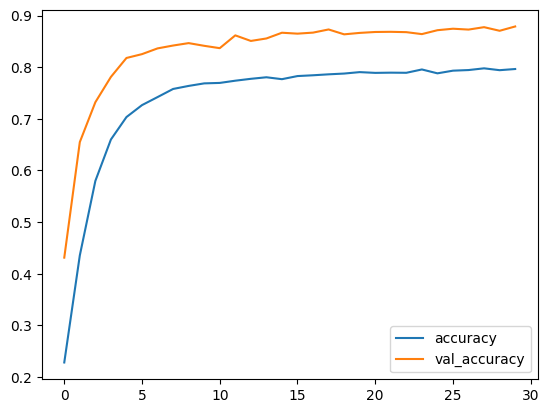

In [49]:
history_df = pd.DataFrame({'accuracy': history.history['accuracy'], 'val_accuracy': history.history['val_accuracy']})
history_df.plot()

In [52]:
model.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8813 - loss: 0.4541


[0.45719921588897705, 0.8788889050483704]

In [50]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred = np.argmax(y_pred,axis=1)
y_pred

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0, 1, 0, ..., 5, 7, 6])

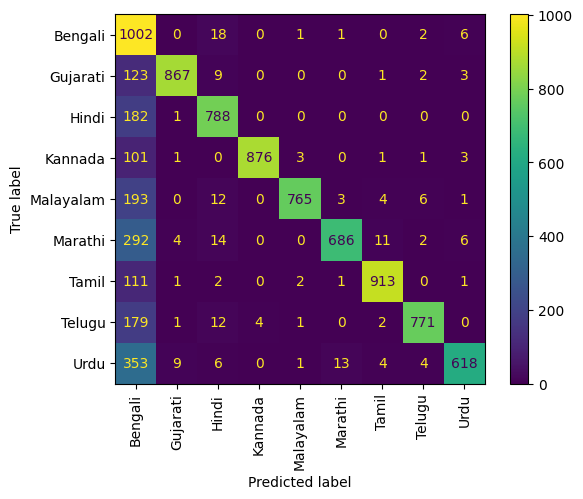

In [51]:
cnf = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cnf,display_labels=lbl.classes_).plot()
plt.xticks(rotation=90)
plt.show()